In [56]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
CONTENT_PATH = '/home/rkruger/Doutorado'

In [ ]:
class ExperimentParameters:
    epochs = 0
    dataset_length = 0
    training_ratio = 0.0
    training_length = 0
    testing_length = 0
    ring_dimension = 0
    multiplicative_depth = 0
    encrypting_time = 0.0
    training_time = 0.0
    testing_time = 0.0

In [ ]:
def read_parameters(parameters_file_path):
    params = ExperimentParameters()

    with open(parameters_file_path, 'r') as f:
        for line in f:
            l_splitted_line = line.split('=')
            l_param_name = l_splitted_line[0].strip()
            l_param_value = l_splitted_line[1].strip()

            match l_param_name:
                case 'epochs':
                    params.epochs = int(l_param_value)

                case 'datasetLength':
                    params.dataset_length = int(l_param_value)

                case 'trainingRatio':
                    params.training_ratio = float(l_param_value)

                case 'trainingLength':
                    params.training_length = int(l_param_value)

                case 'testingLength':
                    params.testing_length = int(l_param_value)

                case 'ringDimension':
                    params.ring_dimension = int(l_param_value)

                case 'multiplicativeDepth':
                    params.multiplicative_depth = int(l_param_value)

                case 'encryptingTime':
                    params.encrypting_time = float(l_param_value)

                case 'trainingTime':
                    params.training_time = float(l_param_value)

                case 'testingTime':
                    params.testing_time = float(l_param_value)

    return params

In [92]:
l_metrics = []

for l_exp_id in range(1, 19):
    l_exp_folder = f'{CONTENT_PATH}/exp_{l_exp_id}'

    df_predictions = pd.read_csv(f'{l_exp_folder}/predictions.csv', header=None, names=['real', 'predicted'])
    y_true = df_predictions['real']
    y_pred = df_predictions['predicted']

    l_accuracy = accuracy_score(y_true, y_pred)
    l_precision = precision_score(y_true, y_pred)
    l_recall = recall_score(y_true, y_pred)
    l_f1_score = f1_score(y_true, y_pred)

    if os.path.isfile(f'{l_exp_folder}/parameters.csv'):
        l_exp_params = read_parameters(f'{l_exp_folder}/parameters.csv')
        l_training_time = l_exp_params.training_time
        l_testing_time = l_exp_params.testing_time
    else:
        l_training_time = 0.0
        l_testing_time = 0.0

    l_metric = ['CKKS/Perceptron/tanh', str(l_exp_id), l_accuracy, l_precision, l_recall, l_f1_score,
                l_training_time, l_testing_time]
    l_metrics.append(l_metric)

df_metrics = pd.DataFrame(l_metrics,
                          columns=['Algorithm', 'Experiment ID', 'Accuracy', 'Precision', 'Recall', 'F1-score',
                                   'Training Time',
                                   'Testing Time'])
df_metrics

,Algorithm,Experiment ID,Accuracy,Precision,Recall,F1-score,Training Time,Testing Time
0,CKKS/Perceptron/tanh,1,0.636628,0.000000,0.0,0.000000,452.024486,207.190667
1,CKKS/Perceptron/tanh,2,0.604651,0.000000,0.0,0.000000,849.502921,196.403257
2,CKKS/Perceptron/tanh,3,0.860465,0.652174,1.0,0.789474,1515.945452,207.691367
3,CKKS/Perceptron/tanh,4,0.904070,0.731707,1.0,0.845070,1715.436365,210.263834
4,CKKS/Perceptron/tanh,5,0.892442,0.708661,1.0,0.829493,0.000000,0.000000
5,CKKS/Perceptron/tanh,6,0.898256,0.720000,1.0,0.837209,0.000000,0.000000
6,CKKS/Perceptron/tanh,7,0.883721,0.692308,1.0,0.818182,0.000000,0.000000
7,CKKS/Perceptron/tanh,8,0.872093,0.671642,1.0,0.803571,0.000000,0.000000
8,CKKS/Perceptron/tanh,9,0.895349,0.714286,1.0,0.833333,0.000000,0.000000
9,CKKS/Perceptron/tanh,10,0.886628,0.697674,1.0,0.821918,0.000000,0.000000


In [125]:
sns.set_theme(style="ticks", palette="Spectral")

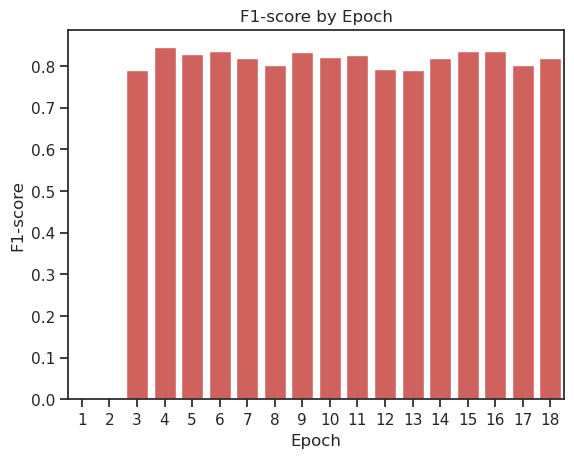

In [126]:
sns.barplot(data=df_metrics, x='Experiment ID', y='F1-score')
plt.title("F1-score by Epoch")
plt.xlabel("Epoch")
plt.ylabel("F1-score")
plt.show()

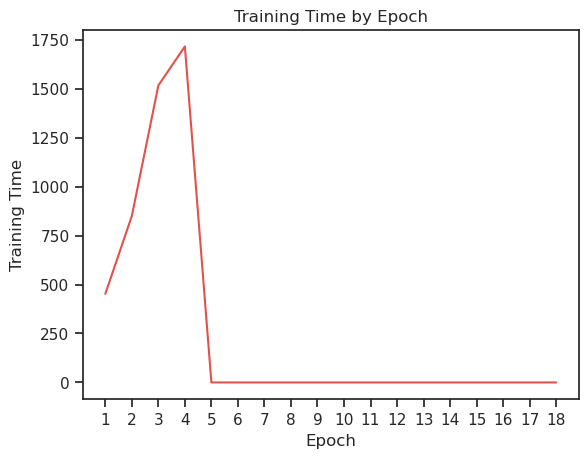

In [132]:
sns.lineplot(data=df_metrics, x='Experiment ID', y='Training Time')
plt.title("Training Time by Epoch")
plt.xlabel("Epoch")
plt.ylabel("Training Time")
plt.show()